In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Cross-Validation and Bias-Variance decomposition
## Cross-Validation
Implementing 4-fold cross-validation below:

In [2]:
# {'lambda' : }

In [3]:
from helpers import load_data

# load dataset
x, y = load_data()

In [4]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

In [5]:
build_k_indices(y, 4, 1)[1:]

array([[21, 36, 19, 42, 49, 26, 22, 13, 41, 17, 45, 24],
       [23,  4, 33, 14, 30, 10, 28, 44, 34, 18, 20, 25],
       [ 6,  7, 47,  1, 16,  0, 15,  5, 11,  9,  8, 12]])

In [6]:
from costs import compute_mse, compute_rmse
from ridge_regression import ridge_regression
from build_polynomial import build_poly

def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    assert k < len(k_indices), 'K is larger than the number of k-folds we create'

    # get k'th subgroup in test, others in train: TODO
    train_i = np.concatenate(np.delete(k_indices, k, axis=0))
    test_i = k_indices[k]
    
    train_x = x[(train_i)]
    train_y = y[(train_i)]
    test_x = x[(test_i)]
    test_y = y[(test_i)]

    train_x = build_poly(train_x, degree)
    test_x = build_poly(test_x, degree)
    
    # ridge regression: TODO
    weights, loss_tr = ridge_regression(train_y, train_x, lambda_)
    # calculate the loss for train and test data: TODO
    loss_te = compute_rmse(test_y, test_x, weights)
    
    return loss_tr, loss_te

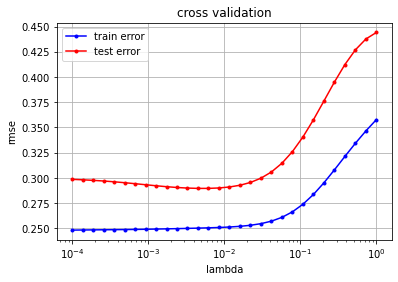

In [7]:
from plots import cross_validation_visualization

def cross_validation_demo():
    seed = 1
    degree = 7
    k_fold = 4
    lambdas = np.logspace(-4, 0, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    
    for lambda_ in lambdas:
        temp_tr = 0
        temp_te = 0
        for k in range(k_fold):
            loss_tr, loss_te = cross_validation(y, x, k_indices, k, lambda_, degree)
            temp_tr += loss_tr
            temp_te += loss_te
        rmse_tr.append(temp_tr/k_fold)
        rmse_te.append(temp_te/k_fold)
        
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)
    return lambdas, rmse_tr, rmse_te

lambdas, rmse_tr, rmse_te = cross_validation_demo()

In [8]:
lambdas[rmse_te.index(min(rmse_te))]

0.004520353656360241

In [9]:
np.linspace(3,15,num = 13)

array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15.])

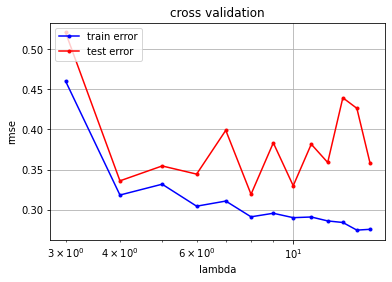

In [10]:
def cross_validation_demo():
    seed = 1
    degrees = np.linspace(3,15,num = 13)
    k_fold = 4
    lambda_ = .3
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    
    for degree in degrees:
        temp_tr = 0
        temp_te = 0
        for k in range(k_fold):
            loss_tr, loss_te = cross_validation(y, x, k_indices, k, lambda_, degree)
            temp_tr += loss_tr
            temp_te += loss_te
        rmse_tr.append(temp_tr/k_fold)
        rmse_te.append(temp_te/k_fold)

    cross_validation_visualization(degrees, rmse_tr, rmse_te)
    return degrees, rmse_tr, rmse_te

degrees, rmse_tr, rmse_te = cross_validation_demo()

In [11]:
degrees[rmse_te.index(min(rmse_te))]

8.0

In [12]:
#From itertools.product()
#https://docs.python.org/3/library/itertools.html#itertools.product

def product(*args, repeat=1):
    # product('ABCD', 'xy') --> Ax Ay Bx By Cx Cy Dx Dy
    # product(range(2), repeat=3) --> 000 001 010 011 100 101 110 111
    pools = [tuple(pool) for pool in args] * repeat
    result = [[]]
    for pool in pools:
        result = [x+[y] for x in result for y in pool]
    for prod in result:
        yield tuple(prod)

In [13]:
#From sklearn ParameterGrid() github
#https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/model_selection/_search.py

class ParameterGrid():
    def __init__(self, grid):
        grid = [grid]
        self.grid = grid
        
    def __iter__(self):
        """Iterate over the points in the grid.
        Returns
        -------
        params : iterator over dict of str to any
            Yields dictionaries mapping each estimator parameter to one of its
            allowed values.
        """
        for p in self.grid:
            # Always sort the keys of a dictionary, for reproducibility
            items = sorted(p.items())
            if not items:
                yield {}
            else:
                keys, values = zip(*items)
                for v in product(*values):
                    params = dict(zip(keys, v))
                    yield params

In [14]:
import numpy as np
g = {'lambda':[0,.5], 'degrees':[3,4], 'gamma' : [100,200]}
a = ParameterGrid(g)
for i in a:
    print(i)

{'degrees': 3, 'gamma': 100, 'lambda': 0}
{'degrees': 3, 'gamma': 100, 'lambda': 0.5}
{'degrees': 3, 'gamma': 200, 'lambda': 0}
{'degrees': 3, 'gamma': 200, 'lambda': 0.5}
{'degrees': 4, 'gamma': 100, 'lambda': 0}
{'degrees': 4, 'gamma': 100, 'lambda': 0.5}
{'degrees': 4, 'gamma': 200, 'lambda': 0}
{'degrees': 4, 'gamma': 200, 'lambda': 0.5}


In [15]:
def cross_validation_demo():
    seed = 1
    parameters =  {'degree':np.linspace(3,15,num = 13), 'lambda':np.logspace(-4, 0, 30)}
    grid_search = ParameterGrid(parameters)
    k_fold = 4
    # split data in k fold
    k_indices = build_k_indices(y, k_fold)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    var_tr = []
    var_te = []
    
    for p in grid_search:
        temp_tr = []
        temp_te = []
        for k in range(k_fold):
            loss_tr, loss_te = cross_validation(y, x, k_indices, k, p['lambda'], p['degree'])
            temp_tr.append(loss_tr)
            temp_te.append(loss_te)
        var_tr.append(np.var(temp_tr))    
        var_te.append(np.var(temp_te))
        rmse_tr.append(sum(temp_tr)/k_fold)
        rmse_te.append(sum(temp_te)/k_fold)

    #cross_validation_visualization(degrees, rmse_tr, rmse_te)
    return list(grid_search), rmse_tr, rmse_te, var_tr, var_te

degrees, rmse_tr, rmse_te, var_tr, var_te = cross_validation_demo()

TypeError: build_k_indices() missing 1 required positional argument: 'seed'

In [ ]:
var_te[rmse_te.index(min(rmse_te))]

In [ ]:
degrees[rmse_te.index(min(rmse_te))]

## Bias-Variance Decomposition
Visualize bias-variance trade-off by implementing the function `bias_variance_demo()` below:

In [ ]:
from least_squares import least_squares
from split_data import split_data
from plots import bias_variance_decomposition_visualization

def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1, 10)
    lambda_ = .2
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        # ***************************************************
        # INSERT YOUR CODE HERE
        # split data with a specific seed: TODO
        # ***************************************************
        train_x, train_y, test_x, test_y = split_data(x, y, ratio_train, seed)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # bias_variance_decomposition: TODO
        # ***************************************************
        for index_deg, degree in enumerate(degrees):
            train_x_d = build_poly(train_x, degree)
            test_x_d = build_poly(test_x, degree)
            
            weights, error = least_squares(train_y, train_x_d)
            #weights, error = ridge_regression(train_y, train_x_d, lambda_)
            
            rmse_te[index_seed, index_deg] = compute_rmse(test_y, test_x_d, weights)
            rmse_tr[index_seed, index_deg] = error
        

    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)

bias_variance_demo()

In [ ]:
def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    assert k < len(k_indices), 'K is larger than the number of k-folds we create'
    
    # get k'th subgroup in test, others in train: TODO
    train_i = np.concatenate(np.delete(k_indices, k, axis=0))
    test_i = k_indices[k]
    
    train_x = x[(train_i)]
    train_y = y[(train_i)]
    test_x = x[(test_i)]
    test_y = y[(test_i)]

    train_x = build_poly(train_x, degree)
    test_x = build_poly(test_x, degree)
    
    # ridge regression: TODO
    weights, loss_tr = ridge_regression(train_y, train_x, lambda_)
    # calculate the loss for train and test data: TODO
    loss_te = compute_rmse(test_y, test_x, weights)
    
    return loss_tr, loss_te

In [ ]:
def kfold_cross_validation(y, x, parameters, k_fold):
    seed = 1
    grid_search = ParameterGrid(parameters)

    k_indices = build_k_indices(y, k_fold, seed)

    rmse_tr = []
    rmse_te = []
    var_tr = []
    var_te = []
    
    for p in grid_search:
        temp_tr = []
        temp_te = []
        for k in range(k_fold):
            loss_tr, loss_te = cross_validation(y, x, k_indices, k, p['lambda'], p['degree'])
            temp_tr.append(loss_tr)
            temp_te.append(loss_te)
        var_tr.append(np.var(temp_tr))    
        var_te.append(np.var(temp_te))
        rmse_tr.append(sum(temp_tr)/k_fold)
        rmse_te.append(sum(temp_te)/k_fold)

    return list(grid_search)[rmse_te.index(min(rmse_te))]

In [ ]:
def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1,10)
    parameters = {'lambda': np.logspace(-4, 0, 30)}
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T

        train_x, train_y, test_x, test_y = split_data(x, y, ratio_train, seed)

        for index_deg, degree in enumerate(degrees):
            parameters['degree'] = [degree]
            best_param = kfold_cross_validation(train_y, train_x, parameters, 4)
            
            train_x_d = build_poly(train_x, degree)
            test_x_d = build_poly(test_x, degree)
            weights, error = ridge_regression(train_y, train_x_d, best_param['lambda'])
            
            rmse_te[index_seed, index_deg] = compute_rmse(test_y, test_x_d, weights)
            rmse_tr[index_seed, index_deg] = error
        

    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)

bias_variance_demo()

In [ ]:
import numpy as np

def build_poly(x, degree):
    """Polynomial basis functions for multivariate inputs
    Parameters
	----------
	x : ndarray of shape (n_rows, n_col)
		Array of training data

	degree : int > 0
        polynomial degree

	Returns
	----------
	poly : np.array (n_rows, expansion)
		x data expanded to the polynomial degree
    
    ind : list (expansion)
        Expanded terms using index of original X array. (Note am using 1 based indexing)

        ex '111' column 1 of x - c1^3
        ex '122' means column 1 and column 2 of x - c1*c2^2
    """
    assert degree > 0, 'Degree must be a natural number'
    row = x.shape[0]
    col = x.shape[1]
    if degree == 1:
        return np.c_[np.ones(row), x], [[str(i+1)] for i in range(col)]
    if degree >= 2:
        poly, ind = build_poly(x, degree-1)
        set_ind = set(tuple(i) for i in ind)

        p_col = poly.shape[1]
        for i in range(col):
            for j in range(1,p_col):
                temp = sorted(ind[i] + ind[j-1])
                set_temp = tuple(temp)

                if(set_temp not in set_ind):
                    mult = x[:,i]*poly[:,j]
                    poly = np.c_[poly, mult]
                    ind.append(temp)
                    set_ind.add(set_temp)
        return poly, ind

In [16]:
bool(set(tuple(i) for i in [['1'],['2'],['3','3']]).add(tuple(['4'])))

False

In [17]:
x = np.array([[1,2,3]])

In [18]:
%%time
build_poly(x, 2)

ValueError: cannot reshape array of size 3 into shape (1,1)

In [19]:
def strings(A, n):
   if n == 0:
      return ['']
   return [s + c for s in strings(A, n - 1) for c in A]

In [20]:
def perms_1(A):
    if not A:
        return [[]]
    perms = []
    for pi in perms_1(A[1:]):
        for i in range(len(A)):
            perms.append(pi[:i] + [A[0]] + pi[i:])
    return perms

In [21]:
perms_1(['x','y','z'])

[['x', 'y', 'z'],
 ['y', 'x', 'z'],
 ['y', 'z', 'x'],
 ['x', 'z', 'y'],
 ['z', 'x', 'y'],
 ['z', 'y', 'x']]

In [22]:
strings('ABC',3)

['AAA',
 'AAB',
 'AAC',
 'ABA',
 'ABB',
 'ABC',
 'ACA',
 'ACB',
 'ACC',
 'BAA',
 'BAB',
 'BAC',
 'BBA',
 'BBB',
 'BBC',
 'BCA',
 'BCB',
 'BCC',
 'CAA',
 'CAB',
 'CAC',
 'CBA',
 'CBB',
 'CBC',
 'CCA',
 'CCB',
 'CCC']

In [23]:
def combination(v):
    indices = []
    ind = [0] * v
    for i in reversed(range(v)):
        if ind[i] <  
        
    return ind

SyntaxError: invalid syntax (<ipython-input-23-d4920b94eeea>, line 5)

In [24]:
def choose_iter(elements, length):
    for i in range(len(elements)):
        if length == 1:
            yield (elements[i],)
        else:
            for next in choose_iter(elements[i+1:len(elements)], length-1):
                yield (elements[i],) + next

In [25]:
for i in choose_iter('ABCD',3):
    print(i)

('A', 'B', 'C')
('A', 'B', 'D')
('A', 'C', 'D')
('B', 'C', 'D')


In [26]:
combination(3)

NameError: name 'combination' is not defined

In [27]:
def printCombination(arr, n, r): 
      
    # A temporary array to  
    # store all combination 
    # one by one 
    data = [0]*r; 
  
    # Print all combination  
    # using temprary array 'data[]' 
    combinationUtil(arr, data, 0,  
                    n - 1, 0, r); 
  
# arr[] ---> Input Array 
# data[] ---> Temporary array to 
#         store current combination 
# start & end ---> Staring and Ending 
#             indexes in arr[] 
# index ---> Current index in data[] 
# r ---> Size of a combination  
# to be printed  
def combinationUtil(arr, data, start,  
                    end, index, r): 
                          
    # Current combination is ready  
    # to be printed, print it 
    if (index == r): 
        for j in range(r): 
            print(data[j], end = " "); 
        print(); 
        return; 
  
    # replace index with all 
    # possible elements. The 
    # condition "end-i+1 >=  
    # r-index" makes sure that  
    # including one element at 
    # index will make a combination  
    # with remaining elements at  
    # remaining positions 
    i = start;  
    while(i <= end and end - i + 1 >= r - index): 
        data[index] = arr[i]; 
        combinationUtil(arr, data, i + 1,  
                        end, index + 1, r); 
        i += 1; 
  
# Driver Code 
arr = [1, 2, 3]; 
r = 3; 
n = len(arr); 
printCombination(arr, n, r); 

1 2 3 


In [28]:
def combinations_with_replacement(iterable, r):
    # combinations_with_replacement('ABC', 2) --> AA AB AC BB BC CC
    pool = tuple(iterable)
    n = len(pool)
    if not n and r:
        return
    indices = [0] * r
    print(tuple(pool[i] for i in indices))
    yield tuple(pool[i] for i in indices)
    while True:
        for i in reversed(range(r)):
            if indices[i] != n - 1:
                break
        else:
            return
        indices[i:] = [indices[i] + 1] * (r - i)
        print(indices)
        yield tuple(pool[i] for i in indices)

In [29]:
for i in combinations_with_replacement('ABC',3):
    print(i)

('A', 'A', 'A')
('A', 'A', 'A')
[0, 0, 1]
('A', 'A', 'B')
[0, 0, 2]
('A', 'A', 'C')
[0, 1, 1]
('A', 'B', 'B')
[0, 1, 2]
('A', 'B', 'C')
[0, 2, 2]
('A', 'C', 'C')
[1, 1, 1]
('B', 'B', 'B')
[1, 1, 2]
('B', 'B', 'C')
[1, 2, 2]
('B', 'C', 'C')
[2, 2, 2]
('C', 'C', 'C')


In [35]:
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import numpy as np

df = pd.DataFrame.from_dict({
    'a': [1],
    'b': [2],
    'c': [3],
    'd': [4],
    'e': [5],
    'f': [6],
    'g': [7],
    'h': [8],
    'i': [9],
    'j': [10],
    'k': [11],
    'l': [1],
    'm': [2],
    'n': [3],
    'o': [4],
    'p': [5],
    'q': [6],
    'r': [7],
    's': [8],
    't': [9],
    'u': [10],
    'v': [11],
    'w': [1],
    'x': [2],
    'y': [3],
    'z': [4],
    'aa': [5],
    'bb': [6],
    'cc': [7],
    'dd': [8]})

p = PolynomialFeatures(degree=4, include_bias = True).fit(df)
f = pd.DataFrame(p.transform(df), columns=p.get_feature_names(df.columns))
print('deg 2\n', f)
# p = PolynomialFeatures(degree=, include_bias = True).fit(df)
# f = pd.DataFrame(p.transform(df), columns=p.get_feature_names(df.columns))
# print('deg 3\n', f)

deg 2
      1    a    b    c    d    e    f    g    h    i  ...  bb^2 dd^2  bb cc^3  \
0  1.0  1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0  9.0  ...     2304.0   2058.0   

   bb cc^2 dd  bb cc dd^2  bb dd^3    cc^4  cc^3 dd  cc^2 dd^2  cc dd^3  \
0      2352.0      2688.0   3072.0  2401.0   2744.0     3136.0   3584.0   

     dd^4  
0  4096.0  

[1 rows x 46376 columns]


In [31]:
row = [1,2,3,4,5,6,7,8,9,10,11]
def poly_feats(input_values, degree):
    if degree==1:
        if 1 not in input_values:
            result = input_values.insert(0,1)
        result=input_values
        return result
    elif degree > 1:
        new_result=[]
        result = poly_feats(input_values, degree-1)
        new_result.extend(result)
        for item in input_values:
            for p_item in result:
                res=item*p_item
                if (res not in result) and (res not in new_result):
                    new_result.append(res)
        return new_result

print('deg 2', len(poly_feats(row, 2)))
print('deg 3', len(poly_feats(row, 3)))
print('deg 4', len(poly_feats(row, 4)))
print('deg 5', len(poly_feats(row, 5)))

deg 2 53
deg 3 173
deg 4 448
deg 5 994


In [32]:
import json

In [33]:
def write_json(filename, object):
    """
    Writes a given object to a json file.
    filename: name of the file (with .json extension)
    object: object to write
    """
    if ".json" not in filename:
        raise NameError("Filename needs to include .json extension!")
    with open(filename, "w") as f:
        json.dump(object, f)

In [34]:
write_json('test.json', {'a':[1,2,3]})

In [9]:
a = ['a','b']

In [10]:
if a:
    print('Hi')

Hi


In [13]:
import numpy as np

In [22]:
a = np.array([0,1])

In [25]:
isinstance()

TypeError: isinstance expected 2 arguments, got 0

In [26]:
isinstance(a, np.ndarray)

True